# 1. Loading Necessary Libraries

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.utils import resample
from sklearn.datasets import make_classification 
from sklearn import metrics

# 2. Loading the Dataset and Splitting into Training and Testing

(45211, 17)
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
Original Data shape (45211, 16)
The shape of X_train is: (31647, 16)
The shape of X_test is: (13564, 16)
The shape of y_train is: (31647,)
The shape of y_test is: (13564,)
no     39922
yes     5289
Name: y, dtype: int64


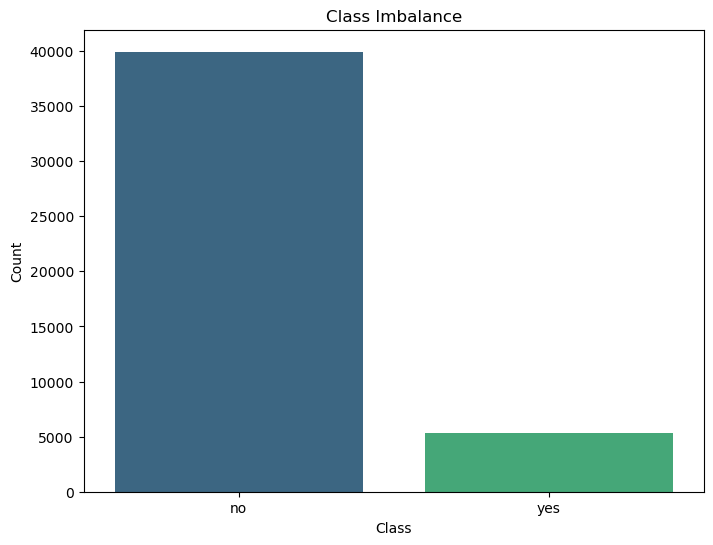

In [21]:
marketting = pd.read_csv('bank_term.csv')


X = marketting.drop(columns=['y'])  # Features
y = marketting['y']  # Target variable

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#checking the shape of the different test and train parameters
print(marketting.shape)
print(marketting.columns)
print('Original Data shape', X.shape)
print('The shape of X_train is:', X_train.shape)
print('The shape of X_test is:', X_test.shape)
print('The shape of y_train is:', y_train.shape)
print('The shape of y_test is:', y_test.shape)

# checking if the dataset has a balance class
class_counts = marketting['y'].value_counts()
print(class_counts)

# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')

plt.title('Class Imbalance')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

# 3. Training Data Pre-processing

### 3.1 Categorical Feature Encoding

In [22]:
# Encoding the Categorical variables
from sklearn.preprocessing import LabelEncoder
# Encode categorical features
X_train_encoded = pd.get_dummies(X_train)

# Encode target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

print(X_train_encoded.shape)
print(y_train_encoded.shape)

print(X_train)
print(X_train_encoded)

(31647, 51)
(31647,)
       age          job   marital  education default  balance housing loan  \
24951   58   management   married    primary      no     1021      no   no   
22129   55  blue-collar   married    unknown      no      196      no   no   
986     50       admin.   married  secondary      no      159     yes   no   
14999   43   management   married    primary      no     1880     yes   no   
4027    53   technician  divorced   tertiary      no      647     yes   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
30403   35   management    single   tertiary      no      995      no   no   
21243   35   management   married   tertiary      no      750     yes   no   
42613   35   management   married   tertiary      no      323      no   no   
43567   70      retired   married  secondary      no      616      no   no   
2732    46  blue-collar    single  secondary      no       57     yes   no   

        contact  day month  duration  camp

### 3.2 Tackling Class Imbalance

0    27953
1     3694
dtype: int64


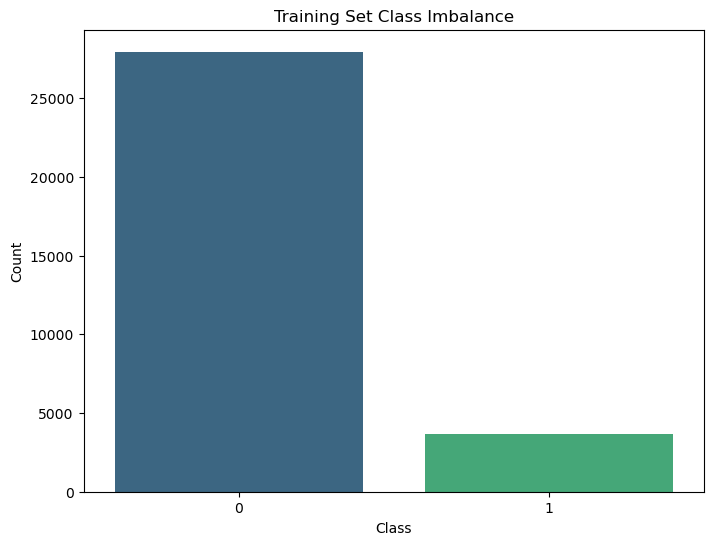

In [23]:
class_counts = pd.Series(y_train_encoded).value_counts()
print(class_counts)

# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')

plt.title('Training Set Class Imbalance')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

In [24]:
# Applying UNDER SAMPLING TECHNIQUE
from imblearn.under_sampling import RandomUnderSampler

# Making an instance of UnderSampling class  
under_sampler = RandomUnderSampler(random_state=42)
  
# Fit predictor (x variable) and target (y variable) using fit_resample() 
X_train, y_train = under_sampler.fit_resample(X_train_encoded, y_train_encoded) 
  
# Printing number of samples 
# in each class after Over-Sampling 
print('After Random Under Sampling: ') 
print('Samples in class No ', (y_train == 0).sum()) 
print('Samples in class Yes ', (y_train == 1).sum())

After Random Under Sampling: 
Samples in class No  3694
Samples in class Yes  3694


# 4 Testing Data Pre-processing

### 4.1 Categorical Feature Encoding

In [25]:

# Encoding the Categorical variables
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
X_test_encoded = pd.get_dummies(X_test)

# Encode target variable
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

print(X_test_encoded.shape)
print(y_test_encoded.shape)


print(X_test)
print(X_test_encoded)

(13564, 51)
(13564,)
       age          job  marital  education default  balance housing loan  \
14001   37   management  married   tertiary      no     1403     yes   no   
32046   36     services   single  secondary      no     -253     yes   no   
13318   47  blue-collar  married    primary      no     -406      no  yes   
42991   57    housemaid  married    primary      no      501     yes  yes   
14237   33  blue-collar  married  secondary     yes     -406     yes  yes   
...    ...          ...      ...        ...     ...      ...     ...  ...   
2666    31   technician  married   tertiary      no        0     yes  yes   
35730   48  blue-collar  married  secondary      no     5078     yes   no   
11495   39    housemaid  married   tertiary      no        4     yes  yes   
20975   42   technician  married   tertiary      no    13410      no  yes   
31975   38  blue-collar  married  secondary      no     1663     yes   no   

         contact  day month  duration  campaign  pdays

### 4.2 Tackling class Imbalance

0    11969
1     1595
dtype: int64


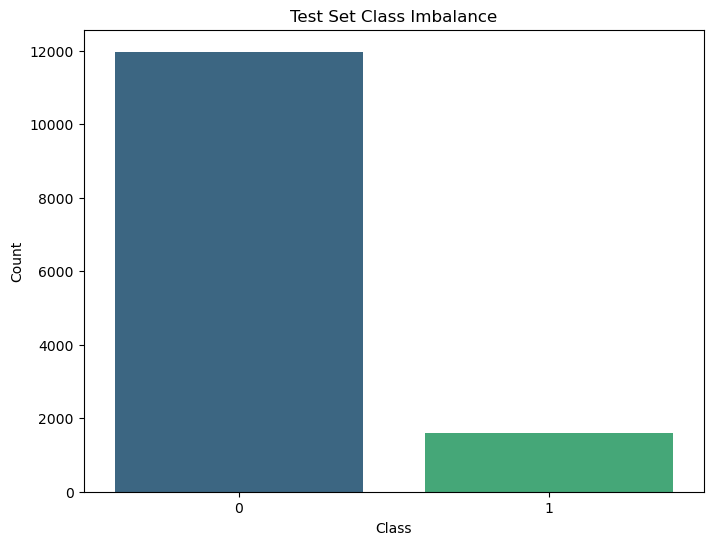

In [26]:
class_counts = pd.Series(y_test_encoded).value_counts()
print(class_counts)

# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')

plt.title('Test Set Class Imbalance')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

In [27]:
# Applying Under Sampling TECHNIQUE

# Making an instance of OverSampler Class  
under_sampler = RandomUnderSampler(random_state=42) 
  
# Fit predictor (x variable) and target (y variable) using fit_resample() 
X_test, y_test = under_sampler.fit_resample(X_test_encoded, y_test_encoded) 
  
# Printing number of samples 
# in each class after Over-Sampling 
print('After Over Sampling: ') 
print('Samples in class No ', (y_test == 0).sum()) 
print('Samples in class Yes ', (y_test == 1).sum())

After Over Sampling: 
Samples in class No  1595
Samples in class Yes  1595


# 5a. Feature Scalling (Standardization)

In [28]:
from sklearn.preprocessing import StandardScaler

# Fit scaler on training data
scaler = StandardScaler()
# Transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform testing data
X_test_scaled = scaler.transform(X_test)


# 5b. Dimensionality Reduction

Cumulative percentage of variance explained by each component:
Components 1 to 1: 7.70%
Components 1 to 2: 13.65%
Components 1 to 3: 18.87%
Components 1 to 4: 23.42%
Components 1 to 5: 27.64%
Components 1 to 6: 31.43%
Components 1 to 7: 34.73%
Components 1 to 8: 37.80%
Components 1 to 9: 40.68%
Components 1 to 10: 43.46%
Components 1 to 11: 45.95%
Components 1 to 12: 48.39%
Components 1 to 13: 50.78%
Components 1 to 14: 53.16%
Components 1 to 15: 55.46%
Components 1 to 16: 57.68%
Components 1 to 17: 59.88%
Components 1 to 18: 62.04%
Components 1 to 19: 64.18%
Components 1 to 20: 66.30%
Components 1 to 21: 68.36%
Components 1 to 22: 70.42%
Components 1 to 23: 72.45%
Components 1 to 24: 74.45%
Components 1 to 25: 76.42%
Components 1 to 26: 78.36%
Components 1 to 27: 80.24%
Components 1 to 28: 82.11%
Components 1 to 29: 83.94%
Components 1 to 30: 85.72%
Components 1 to 31: 87.44%
Components 1 to 32: 89.15%
Components 1 to 33: 90.74%


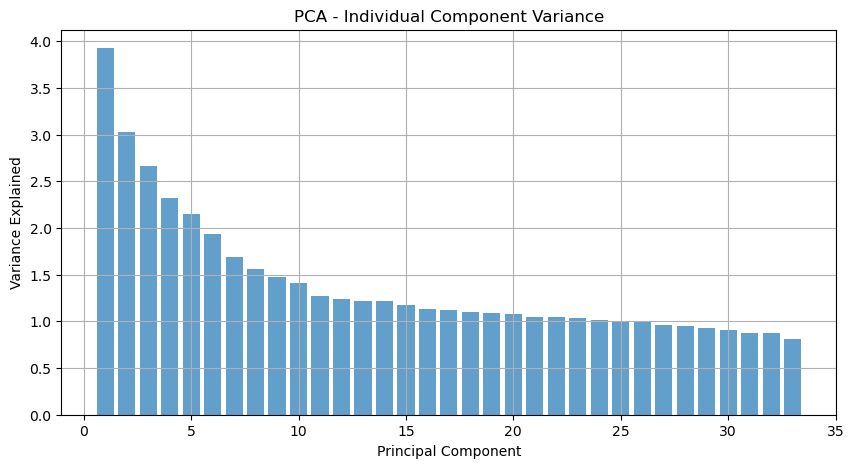

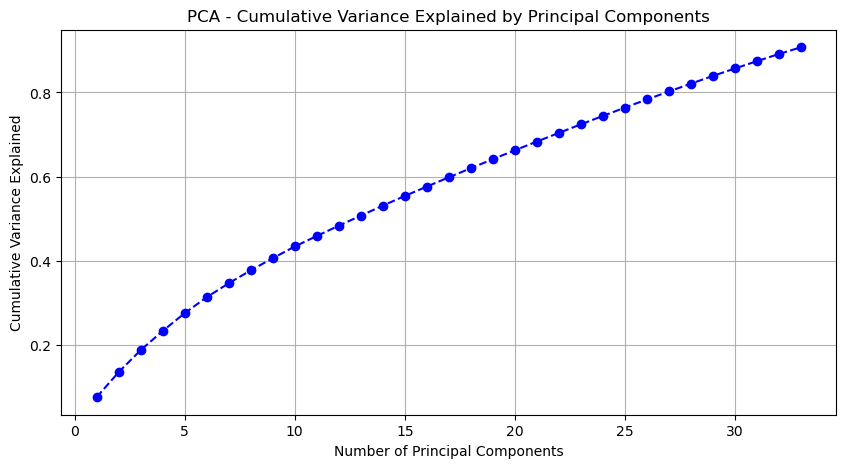

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=33)


X_train_pca = pca.fit_transform(X_train_scaled)

# Individual component variance
individual_variance = pca.explained_variance_

# Cumulative variance explained by each component
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

#Print cumulative percentage of variance explained by each component
print("Cumulative percentage of variance explained by each component:")
for i, cumulative_variance in enumerate(cumulative_variance_ratio):
    print(f"Components 1 to {i + 1}: {cumulative_variance * 100:.2f}%")

# Plot individual component variance
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(individual_variance) + 1), individual_variance, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('PCA - Individual Component Variance')
plt.grid(True)
plt.show()

# Plot cumulative variance explained
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', 
         linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('PCA - Cumulative Variance Explained by Principal Components')
plt.grid(True)
plt.show()

X_test_pca = pca.transform(X_test_scaled)

#------------------------------------

# 6. Machine Learning Algorithm

### 6.1 K-Nearest Neigbhor

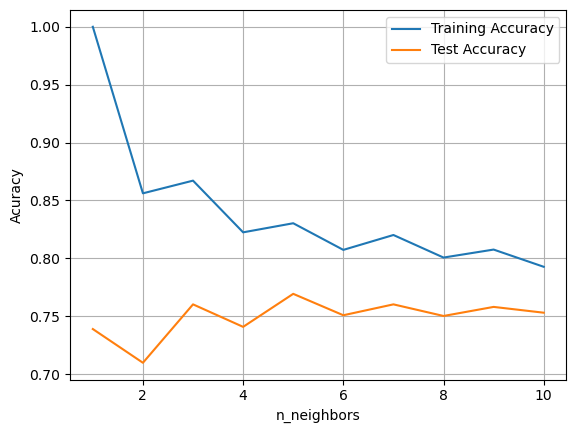

In [30]:
from sklearn.neighbors import KNeighborsClassifier
   
training_accuracy = []
test_accuracy = []
# try n_neigbhors from 1 to 10

neighbors_settings = range(1,11)
for n in neighbors_settings:
    
    #building the model
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_pca, y_train)
    
    #record the training set accuracy
    training_accuracy.append(knn.score(X_train_pca, y_train))
    
    #record the generalisation accuracy
    test_accuracy.append(knn.score(X_test_pca, y_test))
    
    predicted = knn.predict(X_test_pca)
    # Calculate the confusion matrix
    confusion_matrix = metrics.confusion_matrix(y_test, predicted)

    # Plot the confusion matrix
#     plt.figure(figsize=(0.5, 0.5))  
#     cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
#     cm_display.plot()
#     plt.title(f'Confusion Matrix for {n} Neighbors')
#     plt.show()
#     print('=================================================')

plt.plot(neighbors_settings, training_accuracy, label = 'Training Accuracy')
plt.plot(neighbors_settings, test_accuracy, label = 'Test Accuracy')
plt.ylabel('Acuracy'),
plt.xlabel('n_neighbors')
plt.grid()
plt.legend()
    

### 6.2 Decision Tree

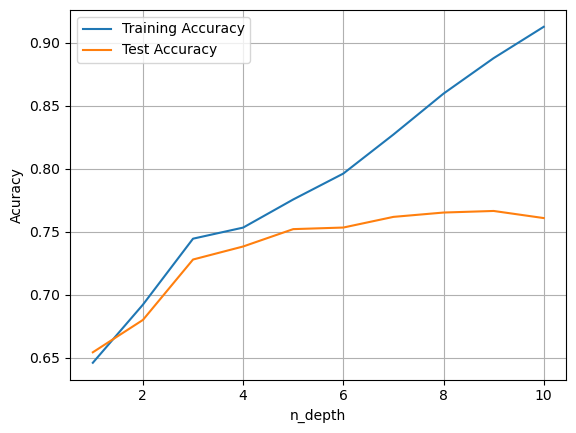

In [31]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

training_accuracy = []
test_accuracy = []
# try number of depths from 1 to 10

depth_settings = range(1,11)
for n in depth_settings:
    #building the model
    tree = DecisionTreeClassifier(max_depth=n, random_state=42)
    tree.fit(X_train_pca, y_train)
    #record the training set accuracy
    training_accuracy.append(tree.score(X_train_pca, y_train))
    #record the generalisation accuracy
    test_accuracy.append(tree.score(X_test_pca, y_test))
    
    predicted = tree.predict(X_test_pca)
    # Calculate the confusion matrix
    confusion_matrix = metrics.confusion_matrix(y_test, predicted)

    # Plot the confusion matrix
#     plt.figure(figsize=(0.5, 0.5))  
#     cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
#     cm_display.plot()
#     plt.title(f'Confusion Matrix for {n} Depth')
#     plt.show()
#     print('=================================================')

plt.plot(depth_settings, training_accuracy, label = 'Training Accuracy')
plt.plot(depth_settings, test_accuracy, label = 'Test Accuracy')
plt.ylabel('Acuracy'),
plt.xlabel('n_depth')
plt.grid()
plt.legend()


### 6.3 Random Forest

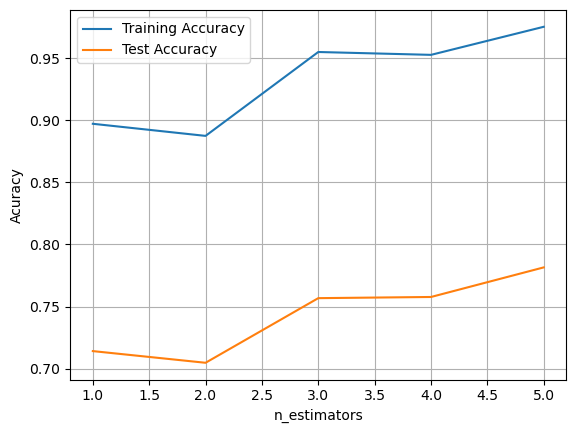

In [32]:
#Random Forest for SMOTE

from sklearn.ensemble import RandomForestClassifier
  
training_accuracy = []
test_accuracy = []
# try number of depths from 1 to 5

estimators_settings = range(1,6)
for n in estimators_settings:
    #building the model
    forest = RandomForestClassifier(n_estimators=n, max_features='sqrt', random_state=3)
    forest.fit(X_train_pca, y_train)
    #record the training set accuracy
    training_accuracy.append(forest.score(X_train_pca, y_train))
    #record the generalisation accuracy
    test_accuracy.append(forest.score(X_test_pca, y_test))
    
#     predicted = forest.predict(X_test_pca)
#     # Calculate the confusion matrix
#     confusion_matrix = metrics.confusion_matrix(y_test, predicted)

    # Plot the confusion matrix
#     plt.figure(figsize=(0.5, 0.5))  
#     cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
#     cm_display.plot()
#     plt.title(f'Confusion Matrix for {n} Estimators')
#     plt.show()
#     print('=================================================')

plt.plot(estimators_settings, training_accuracy, label = 'Training Accuracy')
plt.plot(estimators_settings, test_accuracy, label = 'Test Accuracy')
plt.ylabel('Acuracy'),
plt.xlabel('n_estimators')
plt.grid()
plt.legend()

### 6.4 Gradient Boosting

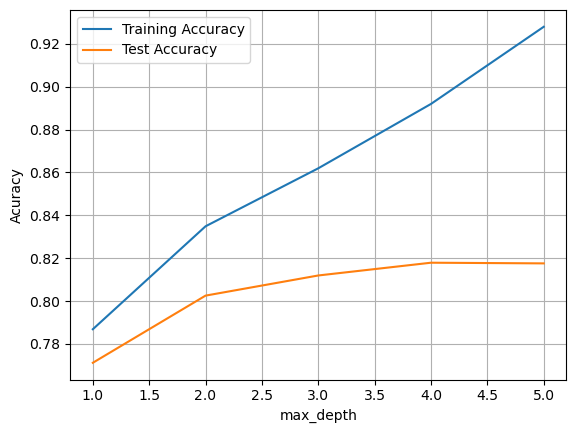

In [33]:
#Random Forest for SMOTE

from sklearn.ensemble import GradientBoostingClassifier
  
training_accuracy = []
test_accuracy = []
# try number of depths from 1 to 5

parameters_settings = range(1,6)
for n in estimators_settings:
    #building the model
    gbrt = GradientBoostingClassifier(max_depth=n, random_state=2)
    gbrt.fit(X_train_pca, y_train)
    #record the training set accuracy
    training_accuracy.append(gbrt.score(X_train_pca, y_train))
    #record the generalisation accuracy
    test_accuracy.append(gbrt.score(X_test_pca, y_test))
    
#     predicted = gbrt.predict(X_test_pca)
#     # Calculate the confusion matrix
#     confusion_matrix = metrics.confusion_matrix(y_test, predicted)

#     # Plot the confusion matrix
#     plt.figure(figsize=(0.5, 0.5))  
#     cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
#     cm_display.plot()
#     plt.title(f'Confusion Matrix for {n} Max_depth')
#     plt.show()
#     print('=================================================')

plt.plot(parameters_settings, training_accuracy, label = 'Training Accuracy')
plt.plot(parameters_settings, test_accuracy, label = 'Test Accuracy')
plt.ylabel('Acuracy'),
plt.xlabel('max_depth')
plt.grid()
plt.legend()


### 6.5 Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.001)
logreg.fit(X_train_pca, y_train)
#record the training set accuracy
training_accuracy = logreg.score(X_train_pca, y_train)
#record the generalisation accuracy
test_accuracy = logreg.score(X_test_pca, y_test)
    
# predicted = logreg.predict(X_test_pca)
# # Calculate the confusion matrix
# confusion_matrix = metrics.confusion_matrix(y_test, predicted)

# # Plot the confusion matrix
# plt.figure(figsize=(0.5, 0.5))  
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
# cm_display.plot()
# plt.title('Linear Regression with C=0.001')
# plt.show()
# print('=================================================')

print(training_accuracy)
print(test_accuracy)

0.8121277747698972
0.8068965517241379


# METRICS

METRICS FOR KNN
Cross Validation 5 Fold:
Accuracy: 0.7272727272727273
Variation +/-: 0.01767758267068551

Metrics:
Accuracy: 0.7692789968652037
Precision: 0.791581805838425
Specificity: 0.8075235109717869
Sensitivity/Recall: 0.7310344827586207
F1 Measure: 0.7601043024771839
G Measure: 0.7601043024771839
Mathews Corr Coef: 0.5401403765158637
Time taken: 0.6597354412078857


<Figure size 50x50 with 0 Axes>

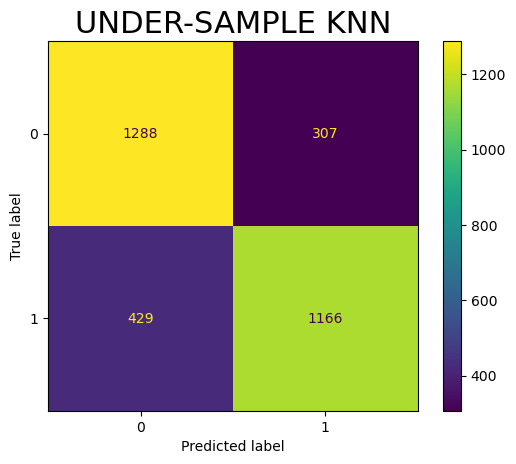

METRICS FOR DECISION TREE
Cross Validation 5 Fold:
Accuracy: 0.7354231974921631
Variation +/-: 0.005729049179466172

Metrics:
Accuracy: 0.7617554858934169
Precision: 0.7830508474576271
Specificity: 0.799373040752351
Sensitivity/Recall: 0.7241379310344828
F1 Measure: 0.752442996742671
G Measure: 0.752442996742671
Mathews Corr Coef: 0.5249989117046819
Time taken: 0.2514760494232178


<Figure size 50x50 with 0 Axes>

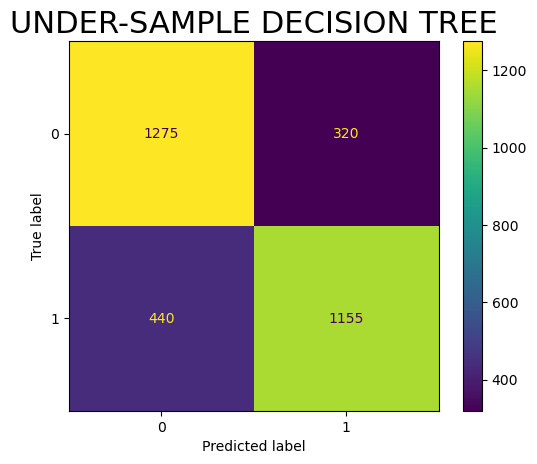

METRICS FOR RANDOM FOREST
Cross Validation 5 Fold:
Accuracy: 0.7567398119122257
Variation +/-: 0.012593924405392264

Metrics:
Accuracy: 0.7815047021943574
Precision: 0.7841772151898734
Specificity: 0.7862068965517242
Sensitivity/Recall: 0.7768025078369906
F1 Measure: 0.780472440944882
G Measure: 0.780472440944882
Mathews Corr Coef: 0.5630343030275528
Time taken: 0.3381974697113037


<Figure size 50x50 with 0 Axes>

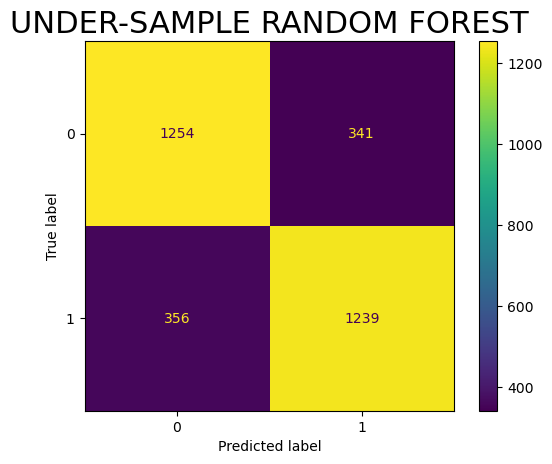

METRICS FOR GRADIENT BOOSTING
Cross Validation 5 Fold:
Accuracy: 0.8003134796238245
Variation +/-: 0.009942790926115178

Metrics:
Accuracy: 0.8178683385579937
Precision: 0.8184673366834171
Specificity: 0.8188087774294671
Sensitivity/Recall: 0.8169278996865204
F1 Measure: 0.8176968936303735
G Measure: 0.8176968936303735
Mathews Corr Coef: 0.635737801642137
Time taken: 24.486716270446777


<Figure size 50x50 with 0 Axes>

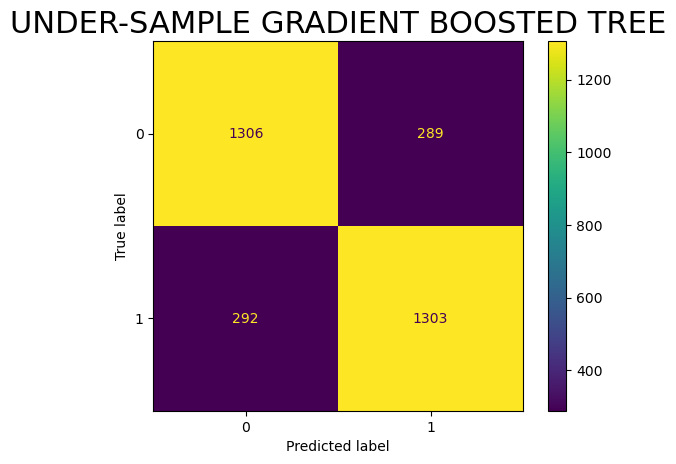

METRICS FOR LOGISTIC REGRESSION
Cross Validation 5 Fold:
Accuracy: 0.7749216300940438
Variation +/-: 0.010658307210031333

Metrics:
Accuracy: 0.8068965517241379
Precision: 0.81765087605451
Specificity: 0.8238244514106583
Sensitivity/Recall: 0.7899686520376176
F1 Measure: 0.8035714285714286
G Measure: 0.8035714285714286
Mathews Corr Coef: 0.6141451756174766
Time taken: 0.04136013984680176


<Figure size 400x300 with 0 Axes>

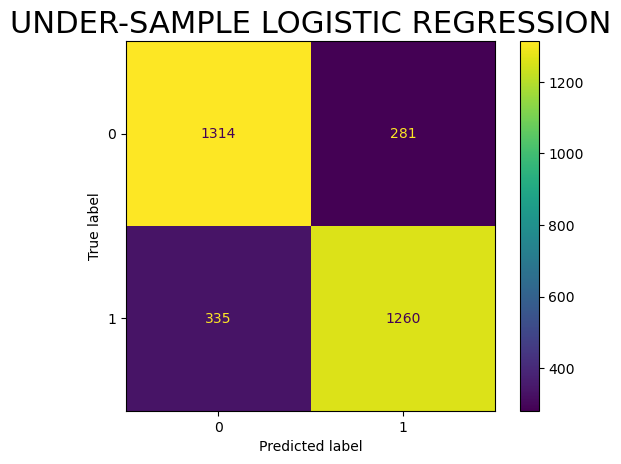

In [35]:
# METRICS

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
import time

# Function to compute metrics
def compute_metrics(model, X, y):
    # Cross-validation 5 folds
    start_time = time.time()
    cv_scores = cross_val_score(model, X, y, cv=5)
    end_time = time.time()
    time_taken = end_time - start_time
    
    # Accuracy and Variation
    accuracy = cv_scores.mean()
    variation = cv_scores.std()
    
    # Metrics
    y_pred = model.predict(X)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    specificity = (y_pred[y == 0] == 0).sum() / (y == 0).sum()
    f1 = f1_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_pred)
    mcc = matthews_corrcoef(y, y_pred)
    
    # Print results
    print("Cross Validation 5 Fold:")
    print("Accuracy:", accuracy)
    print("Variation +/-:", variation)
    print("\nMetrics:")
    print("Accuracy:", accuracy_score(y, y_pred))
    print("Precision:", precision)
    print("Specificity:", specificity)
    print("Sensitivity/Recall:", recall)
    print("F1 Measure:", f1)
    print("G Measure:", 2 * (precision * recall) / (precision + recall))
    print("Mathews Corr Coef:", mcc)
    print("Time taken:", time_taken)

print('METRICS FOR KNN')
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train_pca, y_train)
compute_metrics(knn, X_test_pca, y_test)

predicted = knn.predict(X_test_pca)
# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

# Plot the confusion matrix
plt.figure(figsize=(0.5, 0.5))  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
cm_display.plot()
plt.title('UNDER-SAMPLE KNN', fontsize=22)
plt.show()

print('=============================================')
print('=============================================')

print('METRICS FOR DECISION TREE')
tree = DecisionTreeClassifier(max_depth=7, random_state=42).fit(X_train_pca, y_train)
compute_metrics(tree, X_test_pca, y_test)

predicted = tree.predict(X_test_pca)
# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

# Plot the confusion matrix
plt.figure(figsize=(0.5, 0.5))  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
cm_display.plot()
plt.title('UNDER-SAMPLE DECISION TREE', fontsize=22)
plt.show()

print('=============================================')
print('=============================================')

print('METRICS FOR RANDOM FOREST')
forest = RandomForestClassifier(n_estimators=5, max_features='sqrt', random_state=3).fit(X_train_pca, y_train)
compute_metrics(forest, X_test_pca, y_test)

predicted = forest.predict(X_test_pca)
# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

# Plot the confusion matrix
plt.figure(figsize=(0.5, 0.5))  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
cm_display.plot()
plt.title('UNDER-SAMPLE RANDOM FOREST', fontsize=22)
plt.show()

print('=============================================')
print('=============================================')

print('METRICS FOR GRADIENT BOOSTING')
gbrt = GradientBoostingClassifier(max_depth=4, random_state=2).fit(X_train_pca, y_train)
compute_metrics(gbrt, X_test_pca, y_test)

predicted = gbrt.predict(X_test_pca)
# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

# Plot the confusion matrix
plt.figure(figsize=(0.5, 0.5))  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
cm_display.plot()
plt.title('UNDER-SAMPLE GRADIENT BOOSTED TREE', fontsize=22)
plt.show()

print('=============================================')
print('=============================================')

print('METRICS FOR LOGISTIC REGRESSION')
logreg = LogisticRegression(C=0.001).fit(X_train_pca, y_train)
compute_metrics(logreg, X_test_pca, y_test)

predicted = logreg.predict(X_test_pca)
# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
cm_display.plot()
plt.title('UNDER-SAMPLE LOGISTIC REGRESSION', fontsize=22)
plt.show()

print('=============================================')
print('=============================================')


# ROC CURVES FOR ALL ALGORITHMS

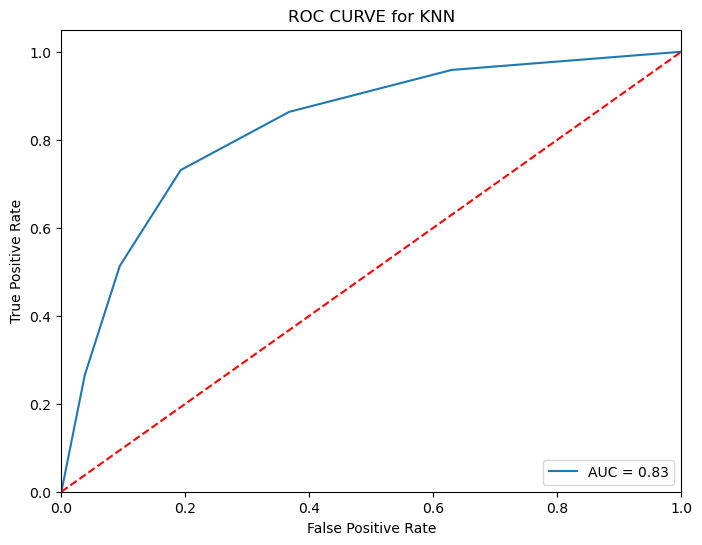

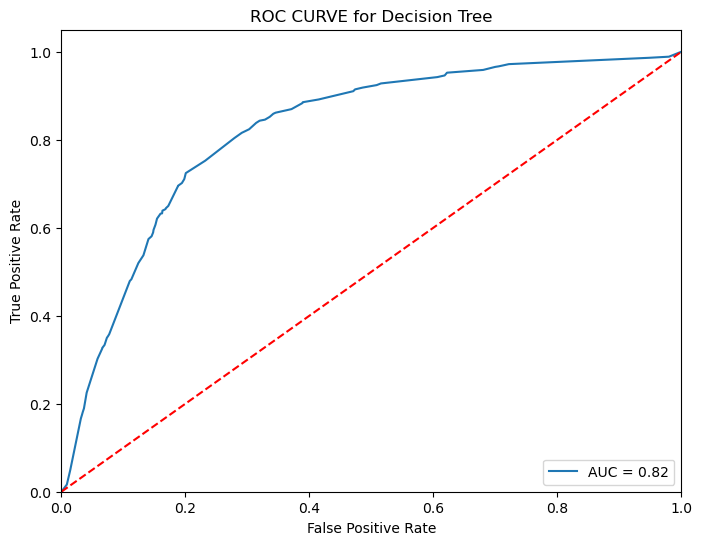

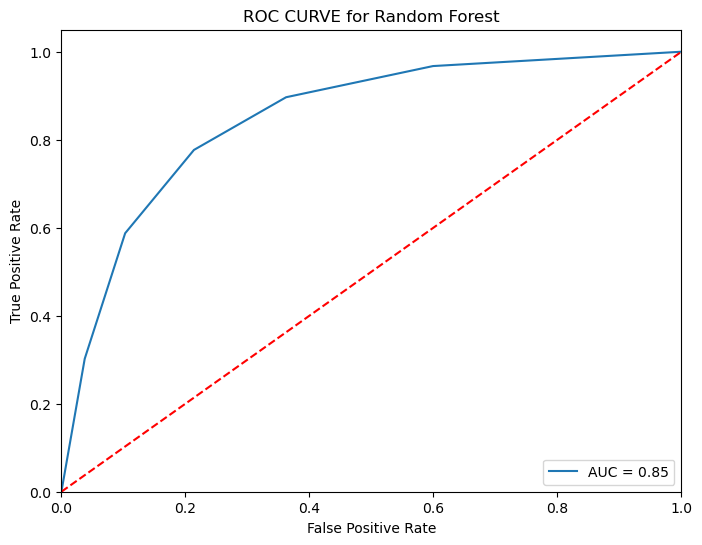

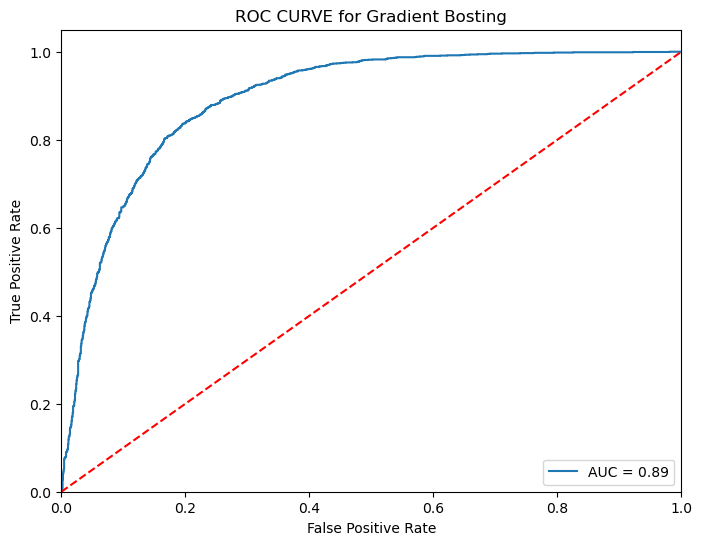

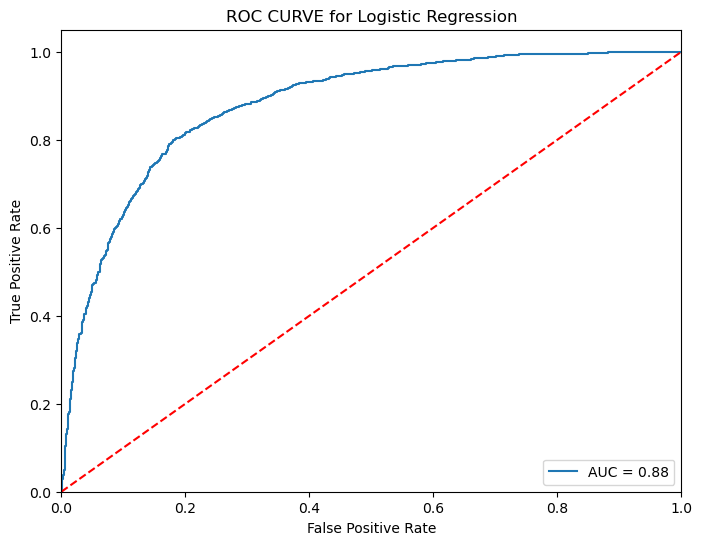

In [36]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test sets
def roc_plot(model, name):
    probs = model.predict_proba(X_test_pca)[:, 1]

    # Calculate ROC curve and AUC for each model
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)


    # Plot ROC curves
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)

    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC CURVE for {name}')
    plt.legend(loc='lower right')
    plt.show()


roc_plot(knn, 'KNN')
roc_plot(tree, 'Decision Tree')
roc_plot(forest, 'Random Forest')
roc_plot(gbrt, 'Gradient Bosting')
roc_plot(logreg, 'Logistic Regression')

